In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from data_process.DataModule import DataModule
from model.vqvae import VQVAE
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_scaler, output_scaler, train_dataloader, test_dataloader = DataModule()

# 参数定义
input_channels = 1        # For example, 1 for univariate time series data
conv_out_channels = 128    # Number of output channels for the convolution layer
kernel_size = 3           # Size of the convolution kernel
hidden_size = 256         # Hidden size for LSTM
num_layers = 2            # Number of LSTM layers
output_size = 1024        # Output size (e.g., length of the output vector)
seq_length = 1024         # Length of the input sequence
n_embeddings = 512
embedding_dim = 64
beta = 0.25

# Initialize model
model = VQVAE(input_channels, conv_out_channels, kernel_size, hidden_size, num_layers, output_size, 
                 n_embeddings, embedding_dim, beta).to(device)


# 超参数
num_epochs = 300
learning_rate = 0.001

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练模型
for epoch in range(num_epochs):
    model.train()
    for batch_inputs, batch_targets in train_dataloader:
        # 将输入数据移动到设备
        batch = batch_inputs.unsqueeze(1).to(device)  # 添加通道维度

        # 前向传播
        embedding_loss, outputs, perplexity = model(batch)

        # 计算损失
        loss = criterion(outputs, batch_targets) + embedding_loss

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")
    
model.eval()  # 设置模型为评估模式
total_loss = 0
with torch.no_grad():  # 在评估过程中不需要计算梯度
    for batch_inputs, batch_targets in test_dataloader:
        # 将输入数据和目标输出移动到设备
        batch_inputs = batch_inputs.unsqueeze(1).to(device)  # 添加通道维度
        batch_targets = batch_targets.to(device)
        
        # 前向传播
        embedding_loss, outputs, perplexity = model(batch_inputs)
        
        # 计算损失
        loss = criterion(outputs, batch_targets)
        total_loss += loss.item()

average_loss = total_loss / len(test_dataloader)
print(f"average_loss: {average_loss:.4f}")

Epoch [1/300], Loss: 0.0525
Epoch [2/300], Loss: 0.0379
Epoch [3/300], Loss: 0.0339
Epoch [4/300], Loss: 0.0364
Epoch [5/300], Loss: 0.0380
Epoch [6/300], Loss: 0.0325
Epoch [7/300], Loss: 0.0411
Epoch [8/300], Loss: 0.0408
Epoch [9/300], Loss: 0.0431
Epoch [10/300], Loss: 0.0475
Epoch [11/300], Loss: 0.0406
Epoch [12/300], Loss: 0.0363
Epoch [13/300], Loss: 0.0365
Epoch [14/300], Loss: 0.0346
Epoch [15/300], Loss: 0.0373
Epoch [16/300], Loss: 0.0349
Epoch [17/300], Loss: 0.0355
Epoch [18/300], Loss: 0.0366
Epoch [19/300], Loss: 0.0363
Epoch [20/300], Loss: 0.0380
Epoch [21/300], Loss: 0.0387
Epoch [22/300], Loss: 0.0384
Epoch [23/300], Loss: 0.0490
Epoch [24/300], Loss: 0.0348
Epoch [25/300], Loss: 0.0342
Epoch [26/300], Loss: 0.0342
Epoch [27/300], Loss: 0.0383
Epoch [28/300], Loss: 0.0358
Epoch [29/300], Loss: 0.0495
Epoch [30/300], Loss: 0.0360
Epoch [31/300], Loss: 0.0330
Epoch [32/300], Loss: 0.0424
Epoch [33/300], Loss: 0.0383
Epoch [34/300], Loss: 0.0322
Epoch [35/300], Loss: 0

In [2]:
import matplotlib.pyplot as plt

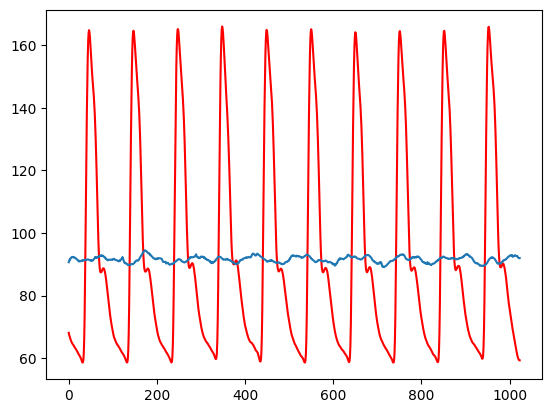

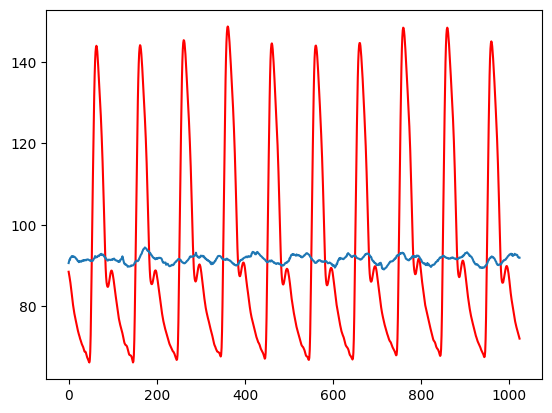

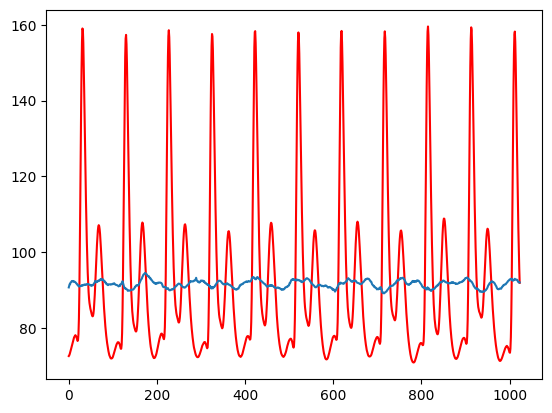

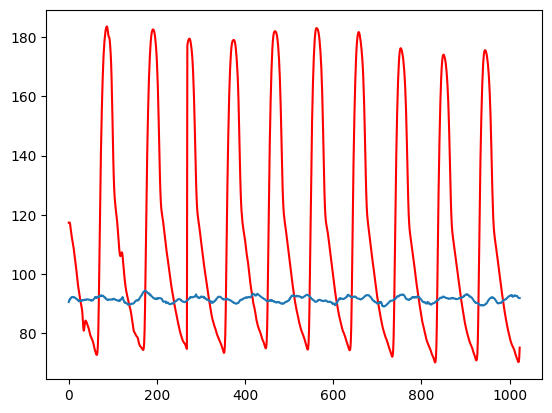

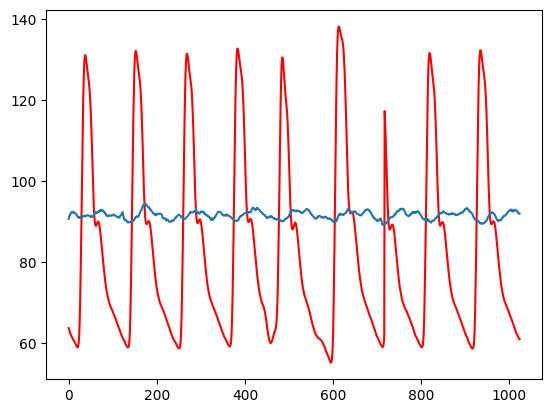

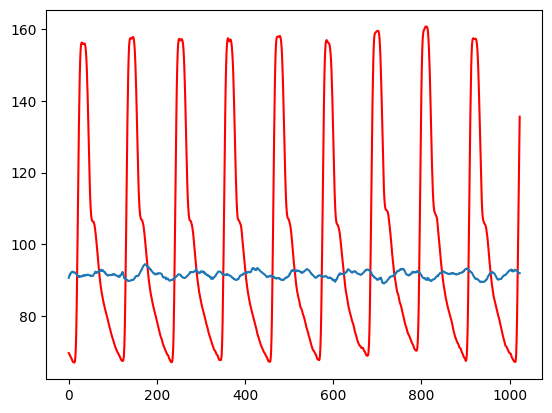

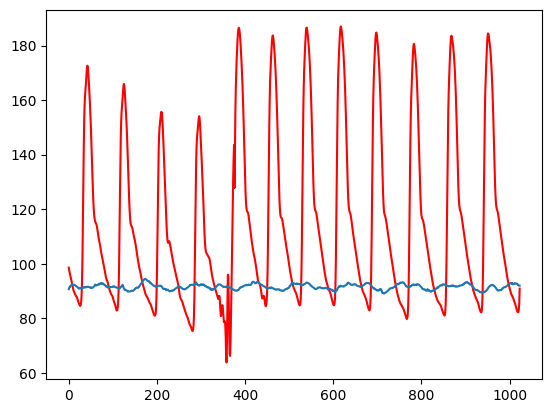

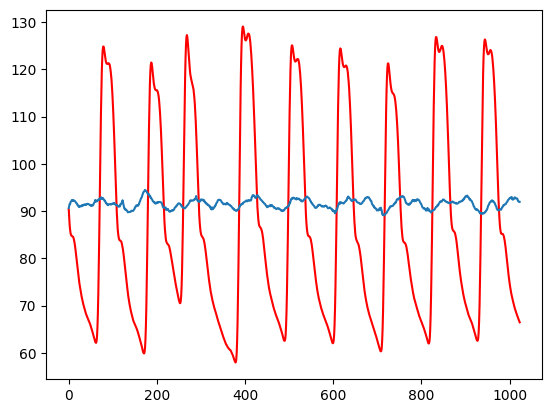

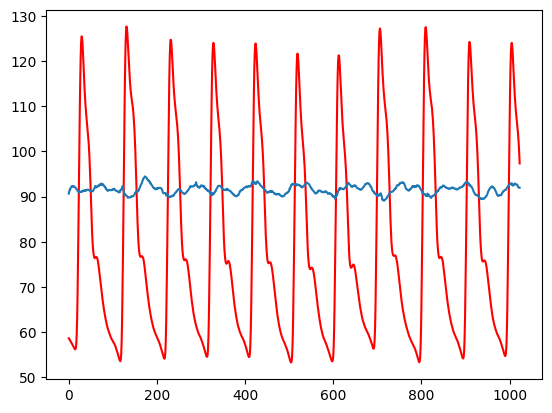

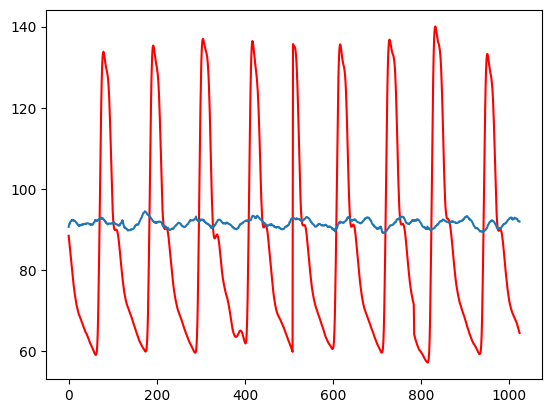

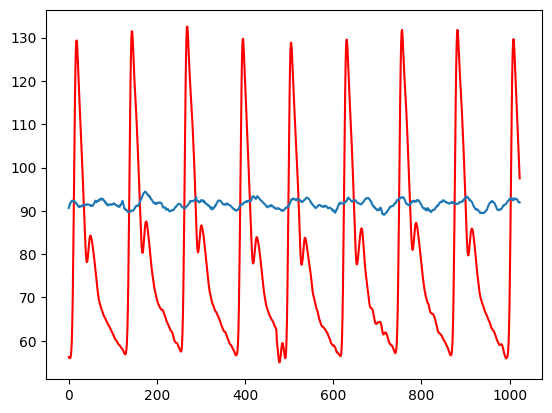

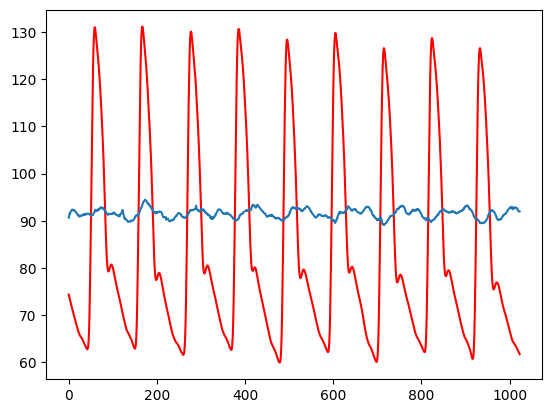

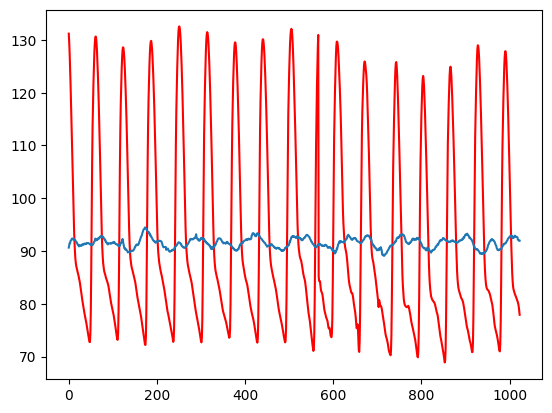

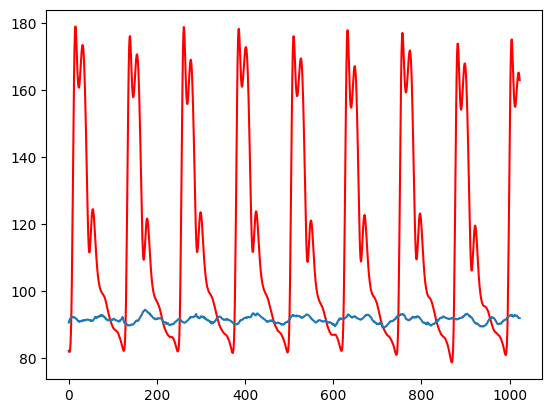

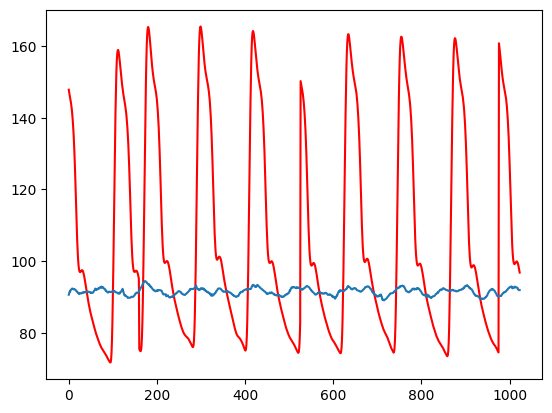

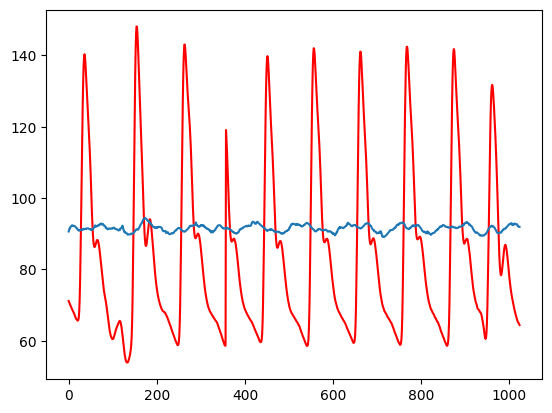

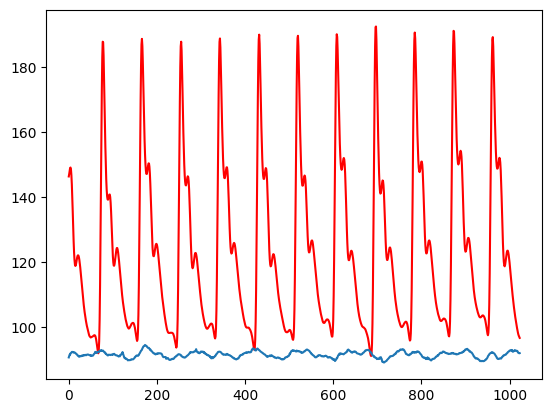

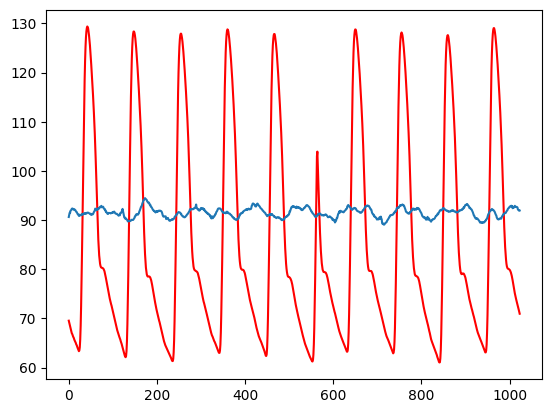

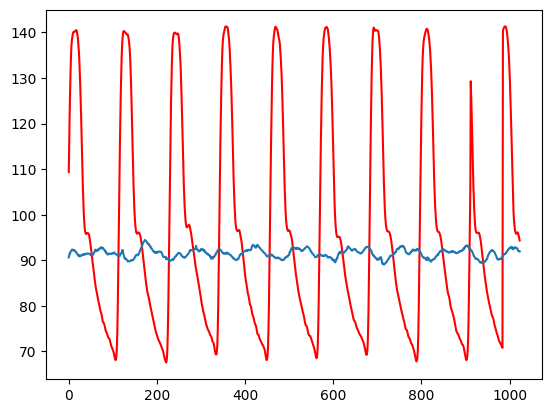

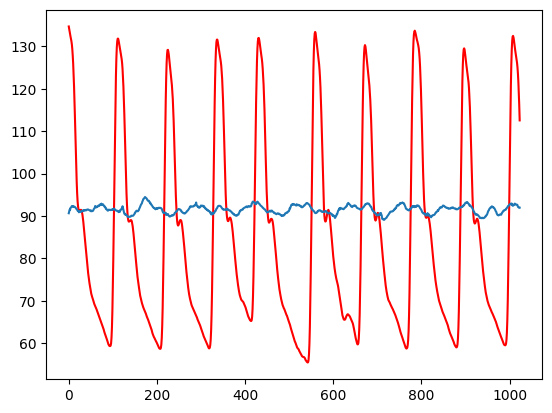

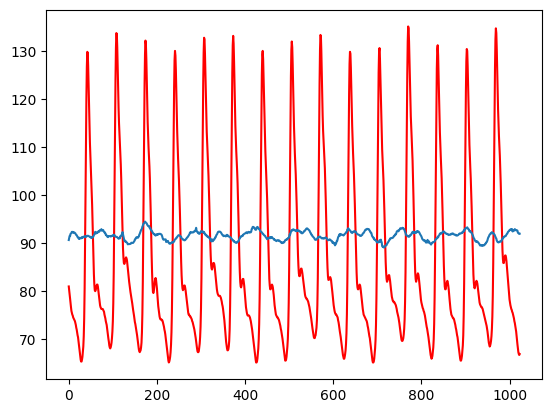

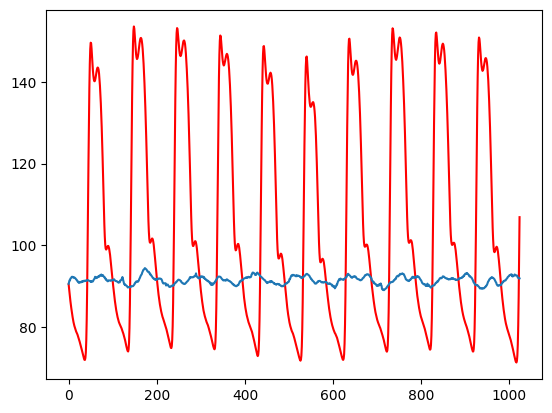

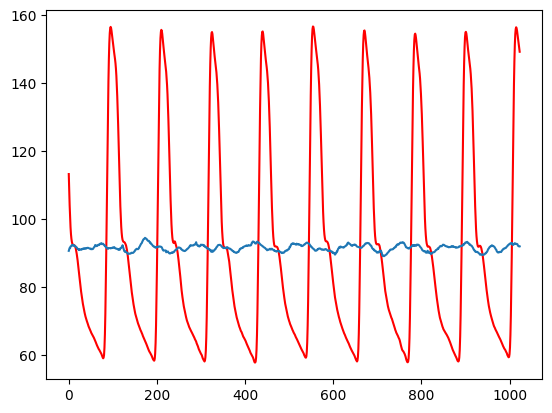

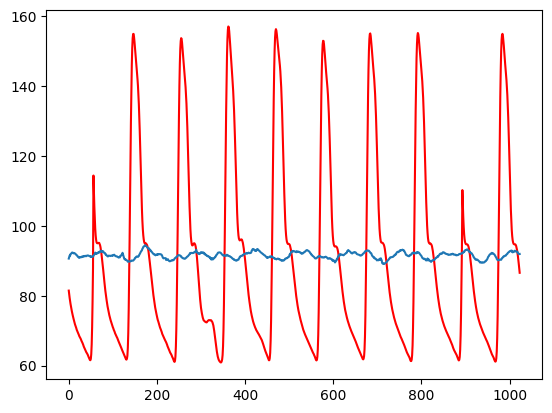

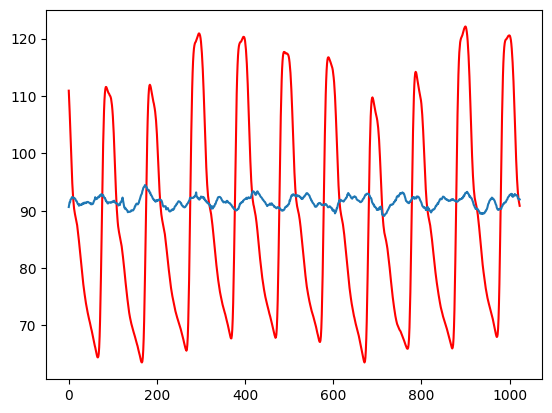

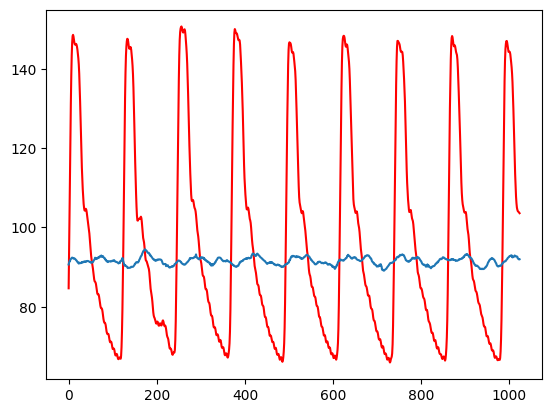

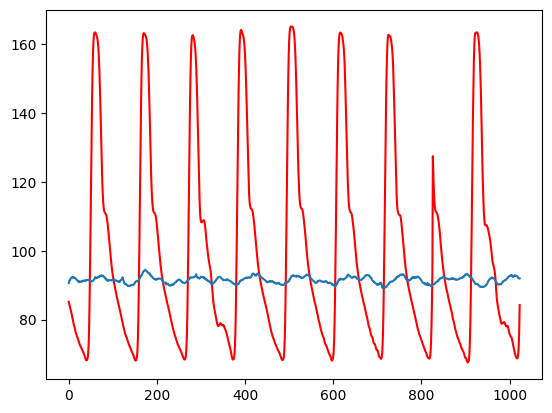

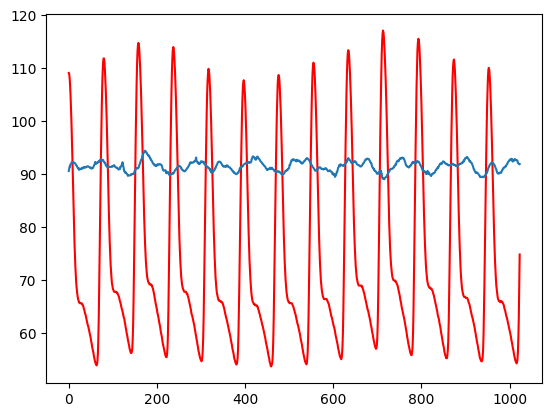

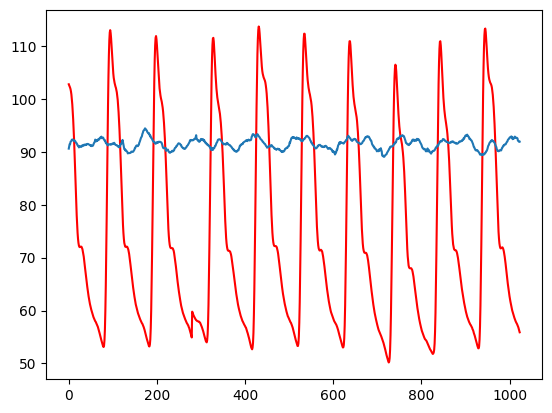

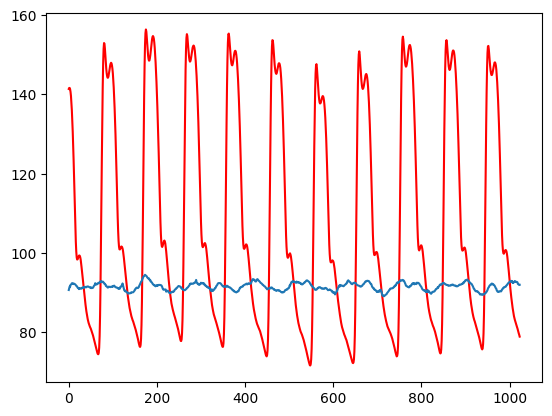

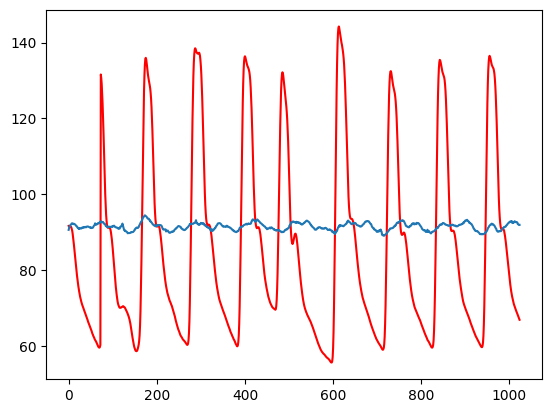

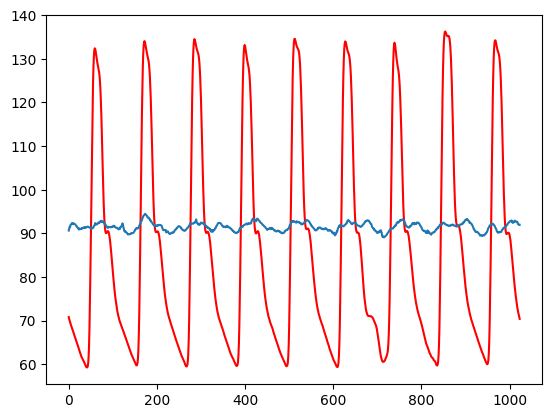

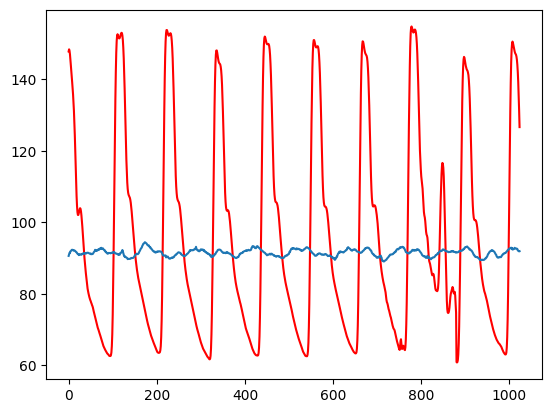

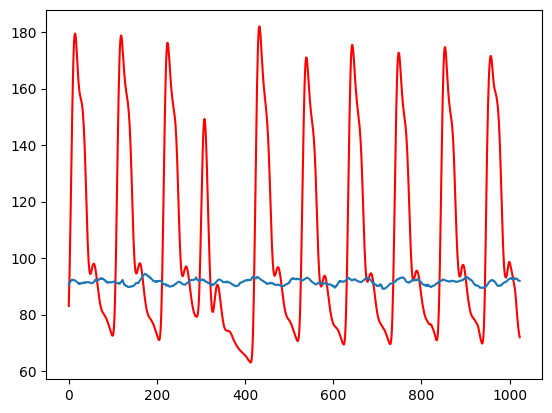

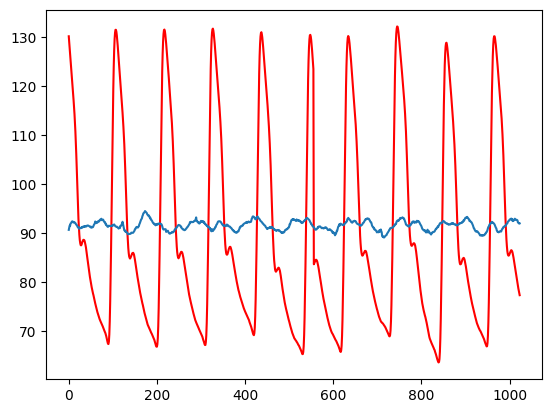

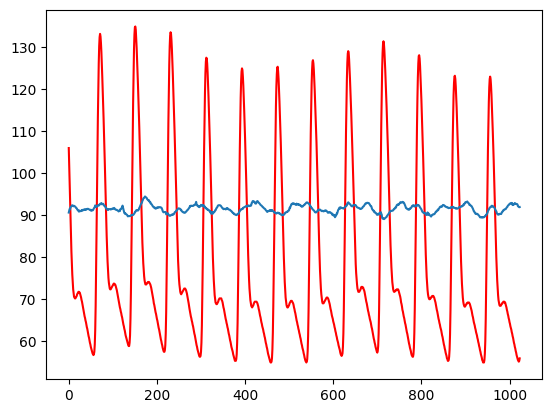

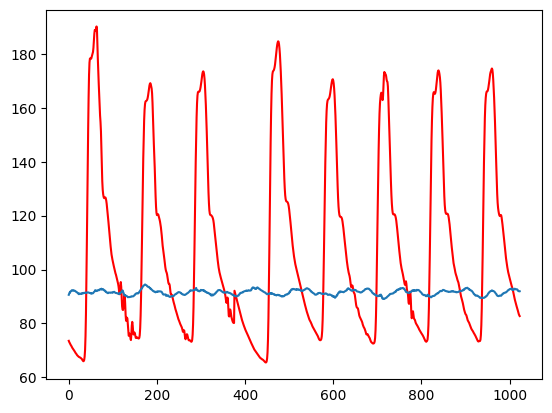

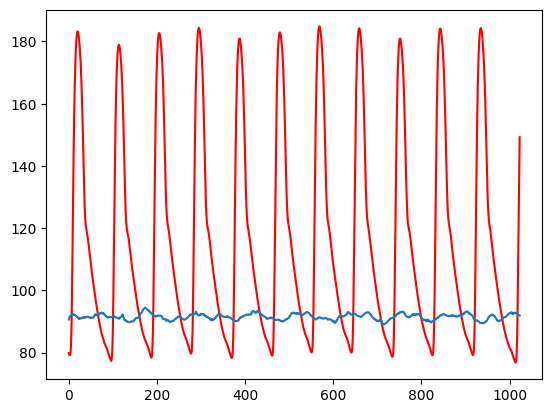

In [3]:
y1 = output_scaler.inverse_transform(batch_targets.cpu())
y2 = output_scaler.inverse_transform(outputs.cpu())

for i in range(0, len(y1)):
    plt.figure()
    plt.plot(y1[i, :], color='red')
    plt.plot(y2[i, :])
    plt.show()